<a href="https://colab.research.google.com/github/sheetaln79/MachineLearning/blob/main/assignment1/part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [68]:
#Using data from the hosted location
df = pd.read_excel("https://archive.org/download/concrete-data/Concrete_Data.xlsx")
df.describe()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [69]:
df.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


Here we do not have any categorical variables in the data, so we do not need to convert it.

In [70]:
#Preprocessing the data set - checking null values
df.isnull().sum()

cement_component                 0
blast_furnace_slag               0
fly_ash_component                0
water_component                  0
superplasticizer                 0
coarse_agg_component             0
fine_agg_component               0
age                              0
concrete_compressive_strength    0
dtype: int64

In [71]:
#Preprocessing the data set - checking NA values
df.isna().sum()

cement_component                 0
blast_furnace_slag               0
fly_ash_component                0
water_component                  0
superplasticizer                 0
coarse_agg_component             0
fine_agg_component               0
age                              0
concrete_compressive_strength    0
dtype: int64

In [72]:
df.shape

(1030, 9)

In [73]:
class LinearRegression():

  def __init__(self):
    pass

  #Preprocessing the data set - dropping NA and duplicate values
  def pre_processing(self, df):
      df = df.dropna()
      df = df.drop_duplicates()
      return df

  #Split the feature and target variables from the data
  def split_X_and_y(self, df):
    no_rows, no_cols = df.shape[0], df.shape[1]
    X =  df.iloc[:, 0:(no_cols -1)]
    y = df.iloc[:, no_cols-1]
    return X,y

  #Normalizing the data
  def scale_data(self, df):
    ss = StandardScaler()
    return pd.DataFrame(ss.fit_transform(df), columns = df.columns)

  #Splitting train and test data
  def split_train_test(self, X, y):
    return train_test_split(X, y, test_size = 0.2, random_state=5)

  #Using SGDRegressor to train the model and predict target values
  def gradient_descent(self, X_train, y_train, X_test, y_test, epochs):
    sgdtrain = SGDRegressor(max_iter=epochs)
    sgdtrain.fit(X_train, y_train)
    y_prediction = sgdtrain.predict(X_test)
    #Plot graph of actual and predicted targets
    plt.scatter(y_test,y_prediction)
    plt.grid()
    plt.xlabel('Actual Target')
    plt.ylabel('Predicted Target')
    plt.title('Scatter plot of actual and predicted targets')
    plt.show()
    print('Mean Squared Error:',mean_squared_error(y_test, y_prediction))
    return y_prediction

#Create the model instance
model = LinearRegression()

In [74]:
df = model.pre_processing(df)

In [75]:
df.shape

(1005, 9)

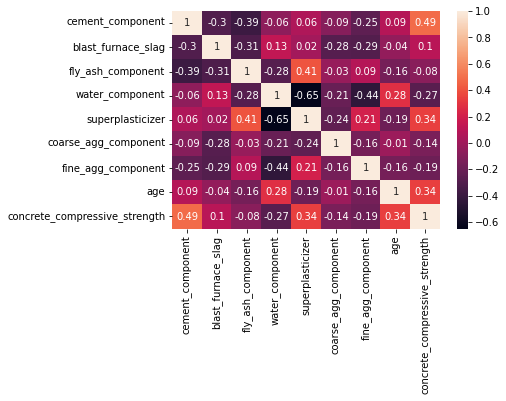

In [76]:
#Constructing heatmap on the dataset
correlation_matrix = df.corr().round(2)
sb.heatmap(data=correlation_matrix, annot=True)

In [77]:
#Defining the values of X and Y i.e. features and target value
X, y = model.split_X_and_y(df)

In [78]:
X.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360


In [79]:

y.head()

0    79.986111
1    61.887366
2    40.269535
3    41.052780
4    44.296075
Name: concrete_compressive_strength, dtype: float64

We would want to scale the data to normalize the deviations.

In [80]:
#Normalizing the dataset using Standard Scaler
scaled_X = model.scale_data(X)
scaled_X.head()

,cement_component,blast_furnace_slag,fly_ash_component,water_component,superplasticizer,coarse_agg_component,fine_agg_component,age
0,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,0.846308,-1.204069,-0.280312
1,2.506120,-0.836469,-0.865363,-0.941128,-0.596903,1.039755,-1.204069,-0.280312
2,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,3.518569
3,0.516534,0.818051,-0.865363,2.153088,-1.019442,-0.546505,-2.225242,5.009865
4,-0.767348,0.700784,-0.865363,0.465334,-1.019442,0.051889,0.657702,4.931375


In [81]:
#Splitting the data set into train and test - ratio 80/20
X_train, X_test, y_train, y_test = model.split_train_test(scaled_X, y)
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (804, 8)
y_train shape:  (804,)
X_test shape:  (201, 8)
y_test shape:  (201,)


Model accuracy

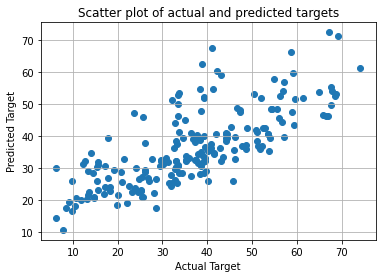

Mean Squared Error: 102.90446844932475


In [82]:
y_pred = model.gradient_descent(X_train, y_train, X_test, y_test, 500)

In [83]:
print("Coefficient of determination (R2):", r2_score(y_test, y_pred))

Coefficient of determination (R2): 0.564098915108856
